<a href="https://colab.research.google.com/github/wagh23/spotify-recommender-r/blob/main/spotifyRecommenderSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following is the submission for intro to R programming course by

*  Tanishka Wagh (SE23UCAM024)

# Introduction

This dataset contains information about **2000 songs** across various genres, spanning from **1998 to 2020**. It includes essential details such as the **artist**, **song title**, and several audio features like **danceability**, **energy**, and **loudness**, which describe the musical and acoustic characteristics of each song. Additionally, the dataset provides **popularity** scores and other attributes such as **explicit content** and **song duration**.

The goal of this analysis is to explore trends in the music industry, examine correlations between different song features, and create a simple **recommendation system**. By leveraging audio features like **danceability**, **energy**, and **tempo**, we can suggest similar songs, providing useful insights for building music recommendation engines.

| Column             | Description                                                                                                                                    |
|--------------------|------------------------------------------------------------------------------------------------------------------------------------------------|
| **artist**         | Name of the Artist.                                                                                                                           |
| **song**           | Name of the Track.                                                                                                                            |
| **duration_ms**    | Duration of the track in milliseconds.                                                                                                        |
| **explicit**       | The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children. |
| **year**           | Release Year of the track.                                                                                                                    |
| **popularity**     | The higher the value, the more popular the song is.                                                                                           |
| **danceability**   | Danceability describes how suitable a track is for dancing based on musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable, and 1.0 is most danceable. |
| **energy**         | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.                                             |
| **key**            | The key the track is in. Integers map to pitches using standard Pitch Class notation. Example: 0 = C, 1 = C#/Db, 2 = D. If no key is detected, the value is -1. |
| **loudness**       | The overall loudness of a track in decibels (dB). Values typically range between -60 and 0 dB.                                                 |
| **mode**           | Indicates the modality (major or minor) of a track. Major is represented by 1, and minor is represented by 0.                                  |
| **speechiness**    | Detects the presence of spoken words in a track. Values above 0.66 likely indicate spoken word tracks (e.g., podcasts). Values below 0.33 are more music-like. |
| **acousticness**   | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.                   |
| **instrumentalness** | Predicts whether a track contains no vocals. Values above 0.5 are instrumental; below 0.5 indicates the track likely contains vocals.        |
| **liveness**       | Detects the presence of an audience in the recording. Higher values indicate the track was performed live.                                      |
| **valence**        | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound positive (e.g., happy), while those with low valence sound negative (e.g., sad). |
| **tempo**          | The overall estimated tempo of a track in beats per minute (BPM).                                                                             |
| **genre**          | Genre of the track.                                                                                                                           |



In [ ]:
install.packages("dplyr")
install.packages("tidytext")
install.packages("tm")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SnowballC’, ‘janeaustenr’, ‘tokenizers’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’, ‘BH’




In [ ]:
library(dplyr)
library(tidytext)
library(tm)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: NLP



# Data Collection

In [ ]:
# Load dataset
sentiment_data <- read.csv("/content/songs_normalize.csv", header = FALSE, stringsAsFactors = FALSE)

# Take the first row as column names
colnames(sentiment_data) <- sentiment_data[1, ]

# Remove the first row from the dataset (it is now used as column names)
sentiment_data <- sentiment_data[-1, ]

# Ensure correct data types (optional)
sentiment_data <- type.convert(sentiment_data, as.is = TRUE)

# View the cleaned dataset
head(sentiment_data)


Warning message in file(file, "rt"):
“cannot open file '/content/songs_normalize.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


# Exploratory Data Analysis

Start by examining the dataset for issues like missing values, inconsistent data types, or duplicates.

In [ ]:
# View structure and summary
str(sentiment_data)
summary(sentiment_data)

# Check for missing values
colSums(is.na(sentiment_data))

# Check for duplicates
sum(duplicated(sentiment_data))


'data.frame':	2000 obs. of  18 variables:
 $ artist          : chr  "Britney Spears" "blink-182" "Faith Hill" "Bon Jovi" ...
 $ song            : chr  "Oops!...I Did It Again" "All The Small Things" "Breathe" "It's My Life" ...
 $ duration_ms     : int  211160 167066 250546 224493 200560 253733 284200 258560 271333 307153 ...
 $ explicit        : chr  "False" "False" "False" "False" ...
 $ year            : int  2000 1999 1999 2000 2000 1999 2000 2000 1999 2001 ...
 $ popularity      : int  77 79 66 78 65 69 86 68 75 77 ...
 $ danceability    : num  0.751 0.434 0.529 0.551 0.614 0.706 0.949 0.708 0.713 0.72 ...
 $ energy          : num  0.834 0.897 0.496 0.913 0.928 0.888 0.661 0.772 0.678 0.808 ...
 $ key             : int  1 0 7 0 8 2 5 7 5 6 ...
 $ loudness        : num  -5.44 -4.92 -9.01 -4.06 -4.81 ...
 $ mode            : int  0 1 1 0 0 1 0 1 0 1 ...
 $ speechiness     : num  0.0437 0.0488 0.029 0.0466 0.0516 0.0654 0.0572 0.0322 0.102 0.0379 ...
 $ acousticness    : num  0.3 0.0

    artist              song            duration_ms       explicit        
 Length:2000        Length:2000        Min.   :113000   Length:2000       
 Class :character   Class :character   1st Qu.:203580   Class :character  
 Mode  :character   Mode  :character   Median :223280   Mode  :character  
                                       Mean   :228748                     
                                       3rd Qu.:248133                     
                                       Max.   :484146                     
      year        popularity     danceability        energy      
 Min.   :1998   Min.   : 0.00   Min.   :0.1290   Min.   :0.0549  
 1st Qu.:2004   1st Qu.:56.00   1st Qu.:0.5810   1st Qu.:0.6220  
 Median :2010   Median :65.50   Median :0.6760   Median :0.7360  
 Mean   :2009   Mean   :59.87   Mean   :0.6674   Mean   :0.7204  
 3rd Qu.:2015   3rd Qu.:73.00   3rd Qu.:0.7640   3rd Qu.:0.8390  
 Max.   :2020   Max.   :89.00   Max.   :0.9750   Max.   :0.9990  
      key    

artist             song      duration_ms         explicit 
               0                0                0                0 
            year       popularity     danceability           energy 
               0                0                0                0 
             key         loudness             mode      speechiness 
               0                0                0                0 
    acousticness instrumentalness         liveness          valence 
               0                0                0                0 
           tempo            genre 
               0                0

[1] 59

## Handle Missing Values

Identify and address missing values based on the column's importance.

In [ ]:
# Replace missing numeric values with the column mean (example)
sentiment_data$popularity[is.na(sentiment_data$popularity)] <- mean(sentiment_data$popularity, na.rm = TRUE)

# Drop rows with too many missing values
sentiment_data <- sentiment_data[rowSums(is.na(sentiment_data)) <= 2, ]


##Convert Data Types


Ensure each column has the correct data type (e.g., year should be numeric, explicit should be logical).

In [ ]:
# Convert columns to appropriate types
sentiment_data$year <- as.numeric(sentiment_data$year)
sentiment_data$explicit <- as.logical(sentiment_data$explicit)
sentiment_data$popularity <- as.numeric(sentiment_data$popularity)

# Check updated types
str(sentiment_data)


'data.frame':	2000 obs. of  18 variables:
 $ artist          : chr  "Britney Spears" "blink-182" "Faith Hill" "Bon Jovi" ...
 $ song            : chr  "Oops!...I Did It Again" "All The Small Things" "Breathe" "It's My Life" ...
 $ duration_ms     : int  211160 167066 250546 224493 200560 253733 284200 258560 271333 307153 ...
 $ explicit        : logi  FALSE FALSE FALSE FALSE FALSE TRUE ...
 $ year            : num  2000 1999 1999 2000 2000 ...
 $ popularity      : num  77 79 66 78 65 69 86 68 75 77 ...
 $ danceability    : num  0.751 0.434 0.529 0.551 0.614 0.706 0.949 0.708 0.713 0.72 ...
 $ energy          : num  0.834 0.897 0.496 0.913 0.928 0.888 0.661 0.772 0.678 0.808 ...
 $ key             : int  1 0 7 0 8 2 5 7 5 6 ...
 $ loudness        : num  -5.44 -4.92 -9.01 -4.06 -4.81 ...
 $ mode            : int  0 1 1 0 0 1 0 1 0 1 ...
 $ speechiness     : num  0.0437 0.0488 0.029 0.0466 0.0516 0.0654 0.0572 0.0322 0.102 0.0379 ...
 $ acousticness    : num  0.3 0.0103 0.173 0.0263 0.04

##Handle Duplicates
Remove duplicate rows to ensure data consistency.

In [ ]:
# Remove duplicates
sentiment_data <- sentiment_data[!duplicated(sentiment_data), ]


## Normalize Numerical Data
For better analysis, normalize numeric features like danceability or energy between 0 and 1.


In [ ]:
# Min-max normalization
normalize <- function(x) {
  (x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE))
}

# Apply normalization to relevant columns
sentiment_data$danceability <- normalize(sentiment_data$danceability)
sentiment_data$energy <- normalize(sentiment_data$energy)
sentiment_data$tempo <- normalize(sentiment_data$tempo)


## Split Multi-Genre Column
If genre contains multiple genres separated by commas, you can split them.

In [ ]:
library(tidyr)
sentiment_data <- sentiment_data %>%
  separate_rows(genre, sep = ", ")


#Specific Visualizations

In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Distribution of Popularity
A histogram or density plot shows how song popularity is distributed.


Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate




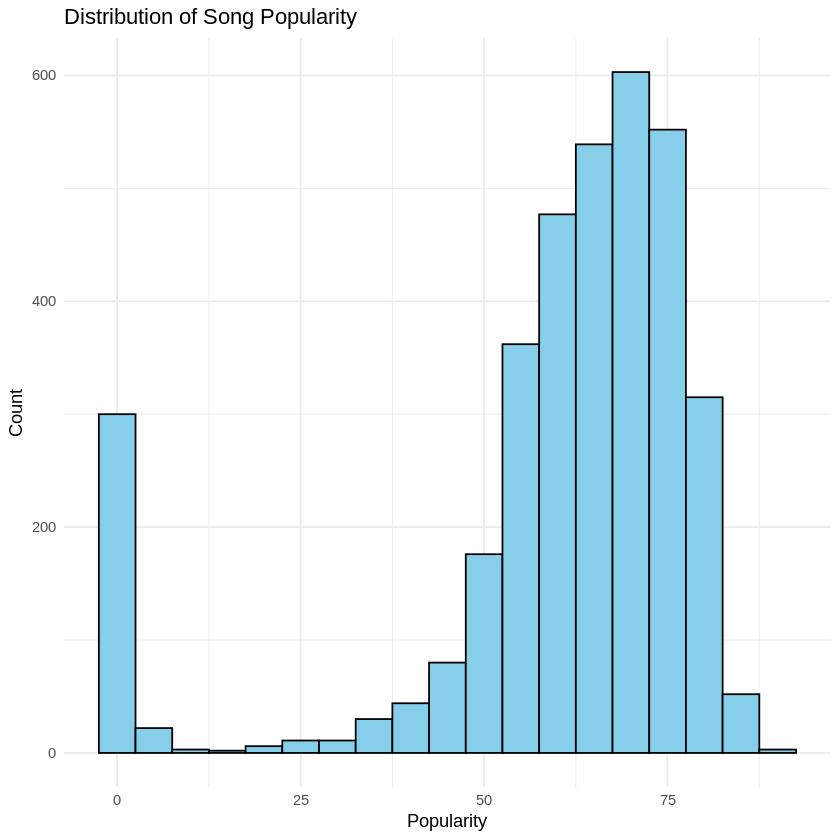

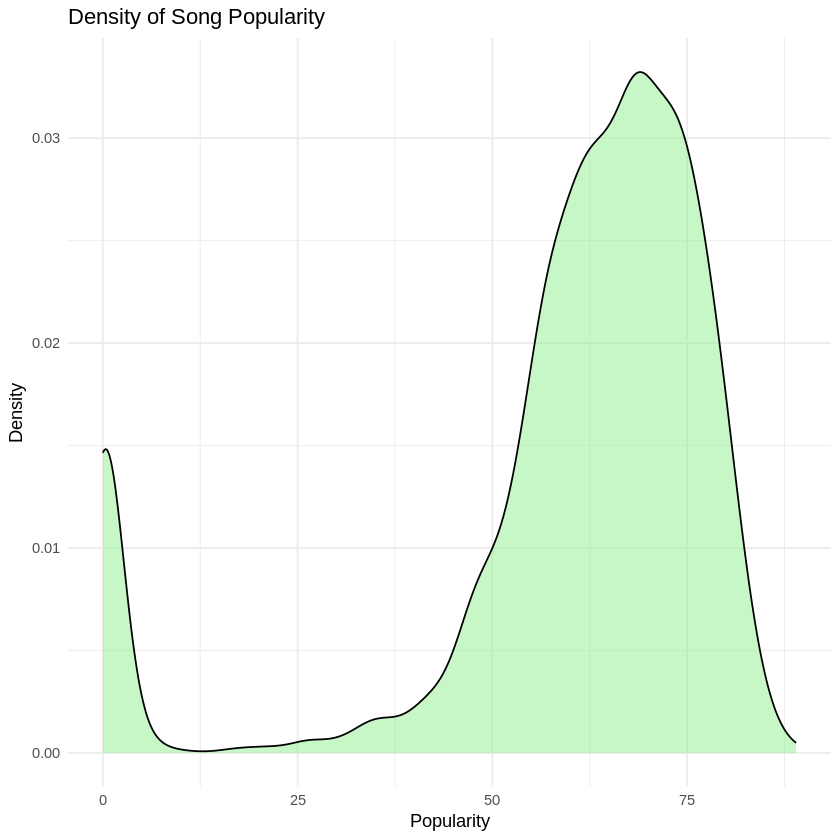

In [ ]:
library(ggplot2)

# Histogram
ggplot(sentiment_data, aes(x = as.numeric(popularity))) +
  geom_histogram(binwidth = 5, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Song Popularity", x = "Popularity", y = "Count") +
  theme_minimal()

# Density plot (optional)
ggplot(sentiment_data, aes(x = as.numeric(popularity))) +
  geom_density(fill = "lightgreen", alpha = 0.5) +
  labs(title = "Density of Song Popularity", x = "Popularity", y = "Density") +
  theme_minimal()


## Genre Popularity
A bar chart of the average popularity for each genre.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



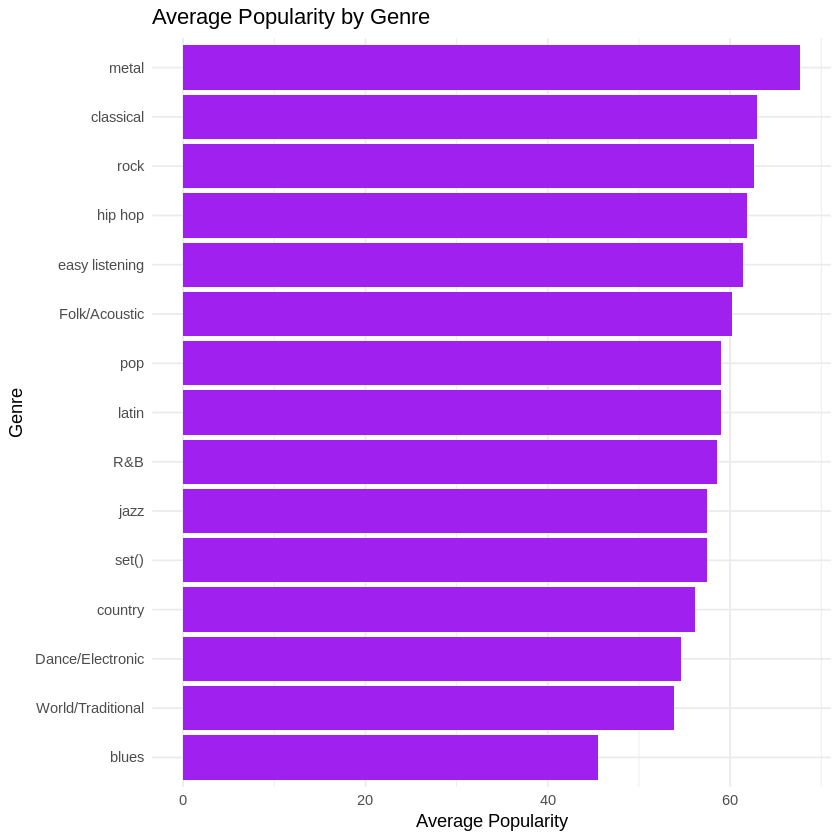

In [ ]:
install.packages("tidyr")  # Install the tidyr package if not already installed
library(tidyr)            # Load the tidyr package into your environment

# Calculate average popularity by genre
genre_popularity <- sentiment_data %>%
  separate_rows(genre, sep = ", ") %>% # Now separate_rows should be found
  group_by(genre) %>%
  summarise(avg_popularity = mean(as.numeric(popularity), na.rm = TRUE)) %>%
  arrange(desc(avg_popularity))

# Bar chart
ggplot(genre_popularity, aes(x = reorder(genre, avg_popularity), y = avg_popularity)) +
  geom_bar(stat = "identity", fill = "purple") +
  coord_flip() +
  labs(title = "Average Popularity by Genre", x = "Genre", y = "Average Popularity") +
  theme_minimal()

## Song Features by Genre
Boxplots to compare features like `danceability` and `energy` across genres.

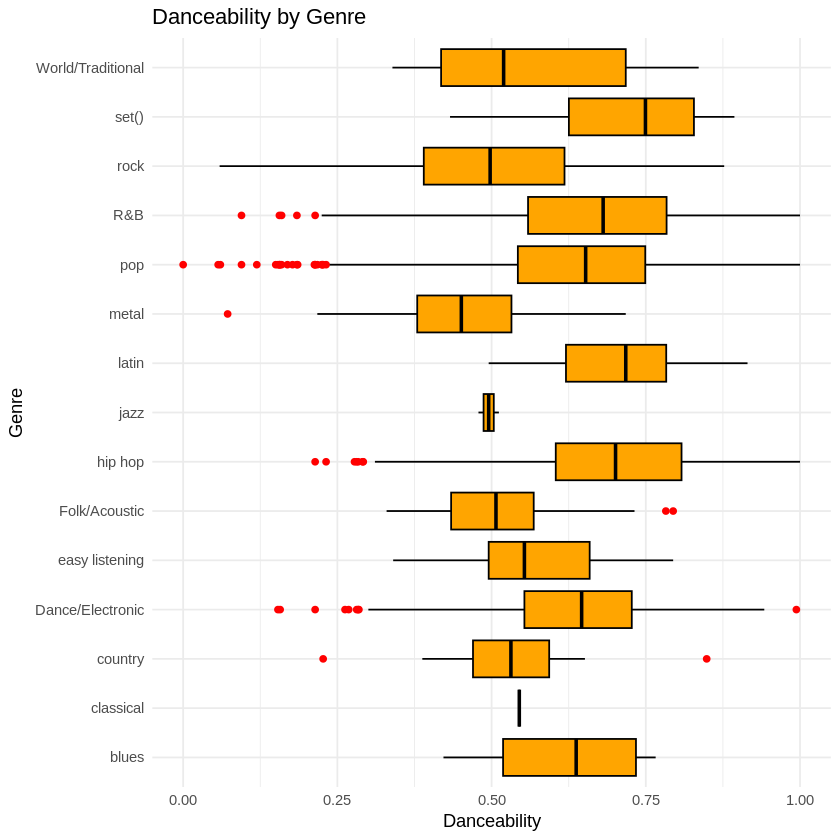

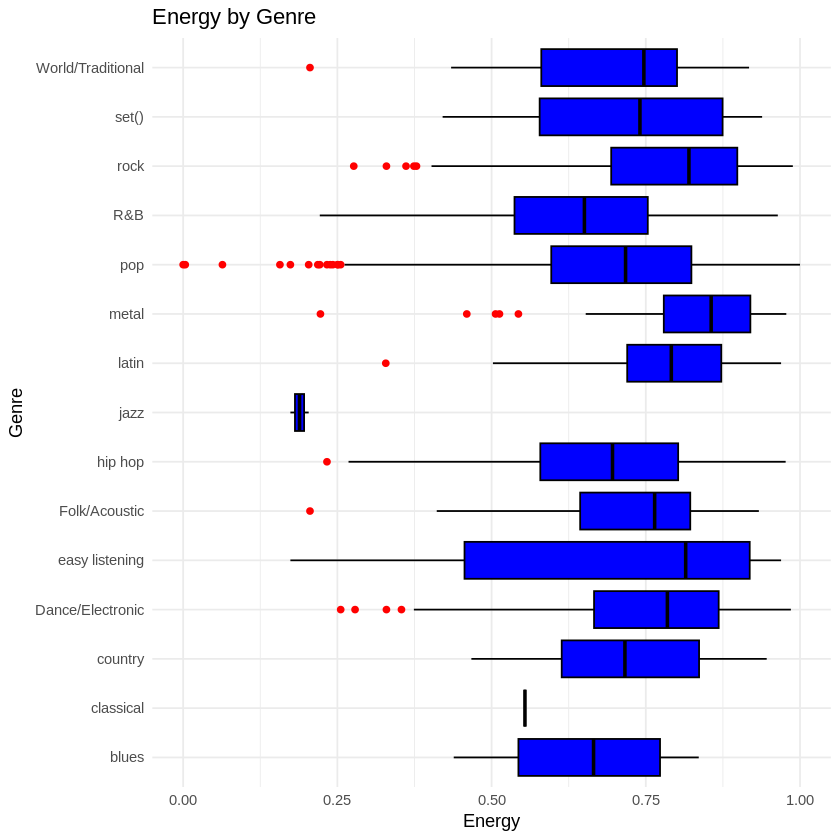

In [ ]:
# Boxplot for Danceability by Genre
ggplot(sentiment_data, aes(x = genre, y = as.numeric(danceability))) +
  geom_boxplot(fill = "orange", color = "black", outlier.color = "red") +
  labs(title = "Danceability by Genre", x = "Genre", y = "Danceability") +
  theme_minimal() +
  coord_flip()

# Boxplot for Energy by Genre
ggplot(sentiment_data, aes(x = genre, y = as.numeric(energy))) +
  geom_boxplot(fill = "blue", color = "black", outlier.color = "red") +
  labs(title = "Energy by Genre", x = "Genre", y = "Energy") +
  theme_minimal() +
  coord_flip()


## Feature Correlations
A scatter plot to visualize the relationship between song features and popularity.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


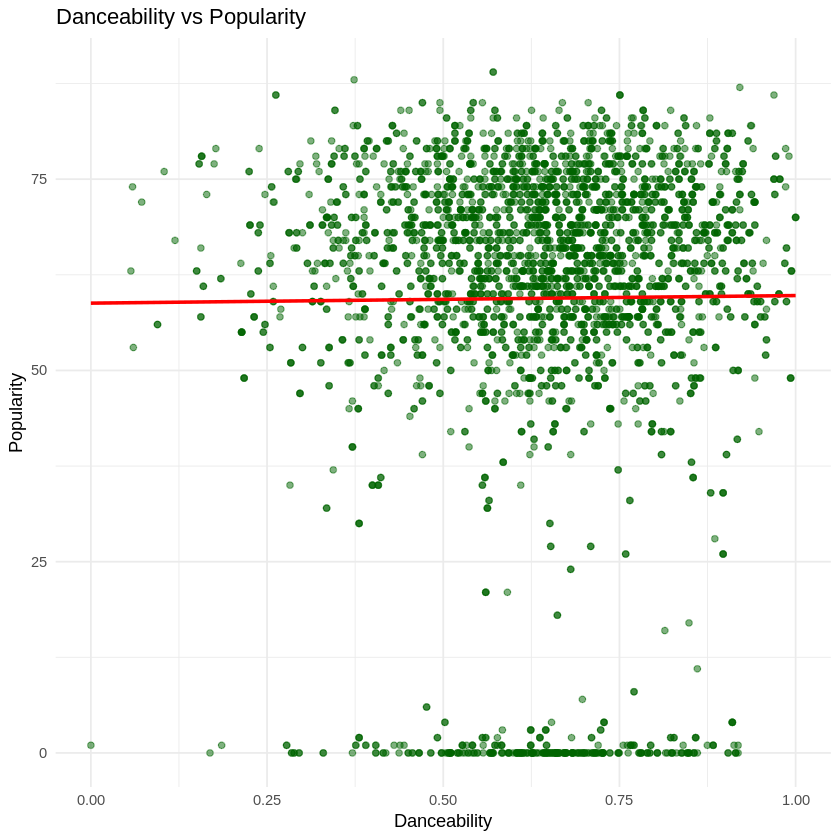

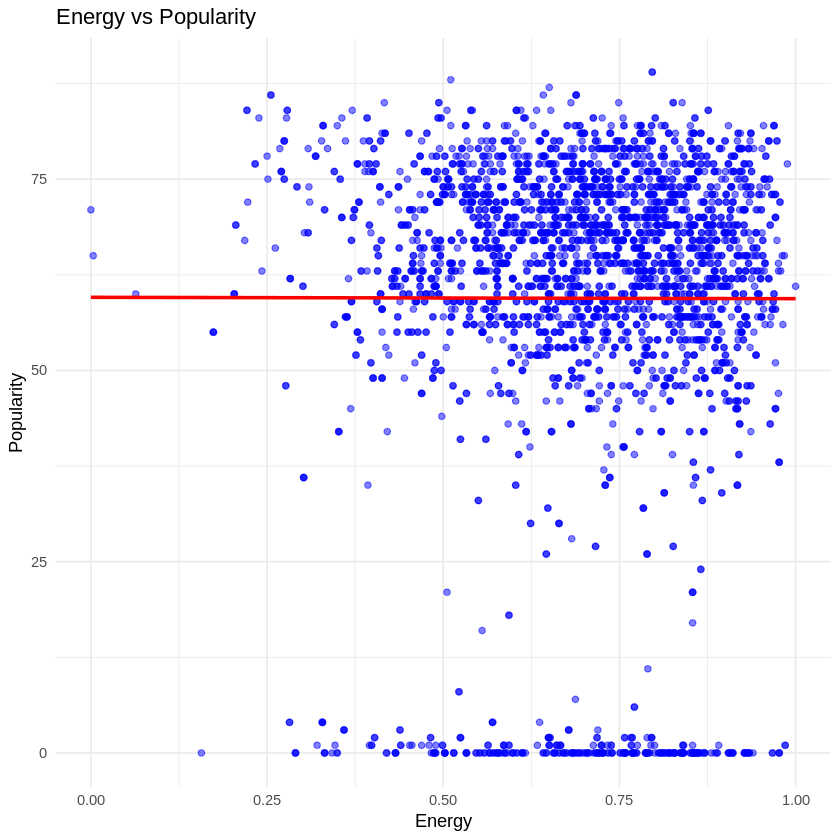

In [ ]:
# Danceability vs Popularity
ggplot(sentiment_data, aes(x = as.numeric(danceability), y = as.numeric(popularity))) +
  geom_point(alpha = 0.5, color = "darkgreen") +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  labs(title = "Danceability vs Popularity", x = "Danceability", y = "Popularity") +
  theme_minimal()

# Energy vs Popularity
ggplot(sentiment_data, aes(x = as.numeric(energy), y = as.numeric(popularity))) +
  geom_point(alpha = 0.5, color = "blue") +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  labs(title = "Energy vs Popularity", x = "Energy", y = "Popularity") +
  theme_minimal()


##Heatmap of Feature Correlations
A heatmap to understand correlations between numerical features.

In [ ]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’





Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




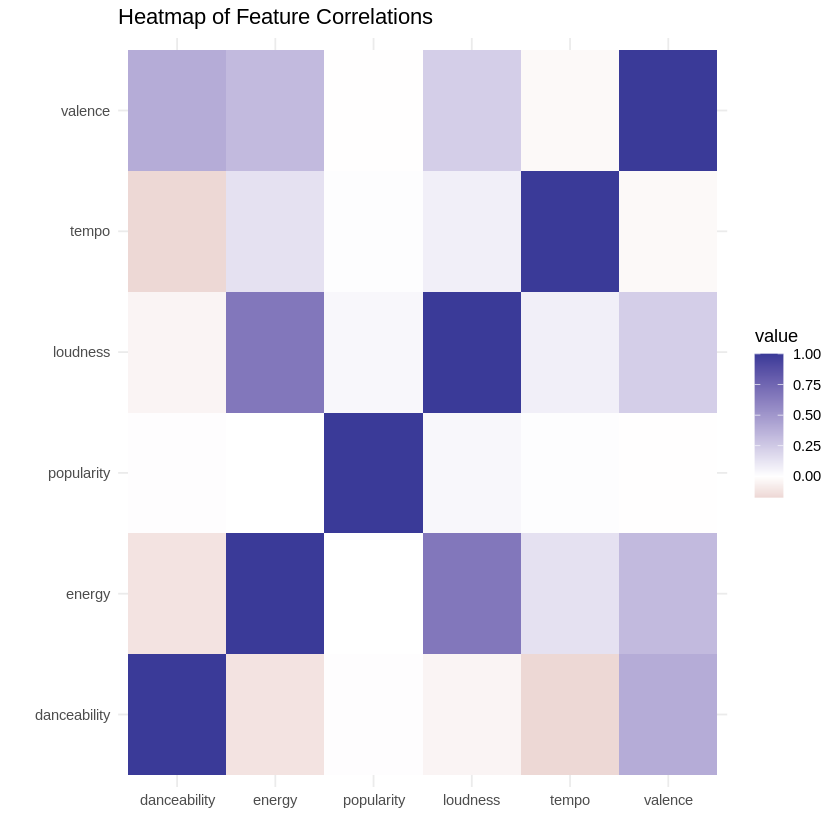

In [ ]:
library(reshape2)
library(ggplot2)

# Select numeric columns
numeric_data <- sentiment_data %>%
  select(danceability, energy, popularity, loudness, tempo, valence)

# Compute correlation matrix
cor_matrix <- cor(numeric_data, use = "complete.obs")

# Melt correlation matrix for plotting
cor_melt <- melt(cor_matrix)

# Heatmap
ggplot(cor_melt, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2( midpoint = 0) +
  labs(title = "Heatmap of Feature Correlations", x = "", y = "") +
  theme_minimal()


##Time Trends
Analyze how song popularity or features vary over time.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


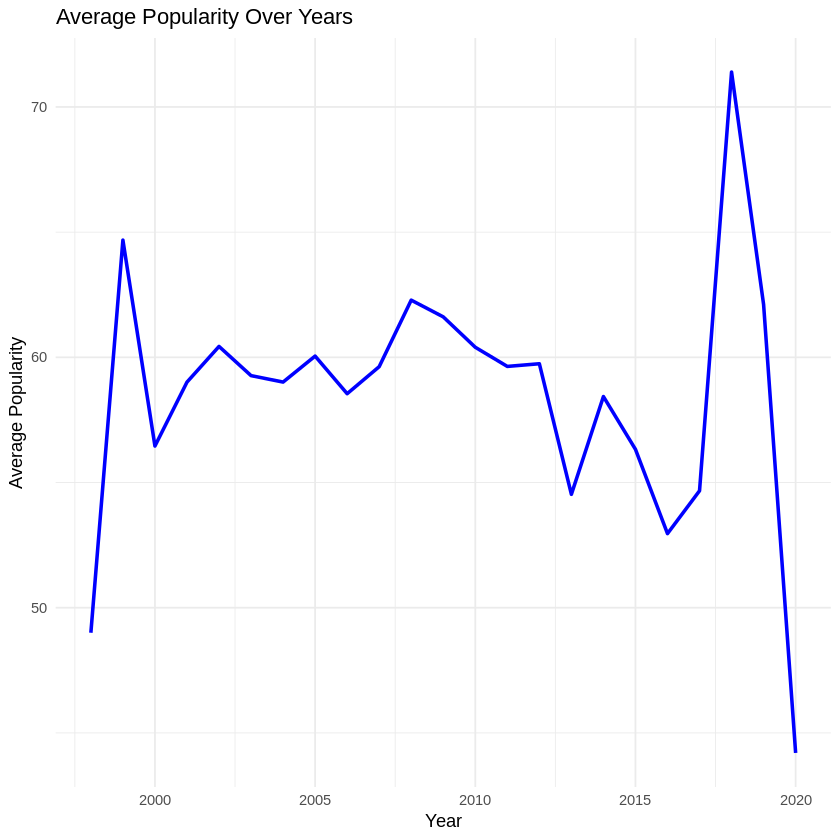

In [ ]:
# Popularity over years
ggplot(sentiment_data, aes(x = as.numeric(year), y = as.numeric(popularity))) +
  geom_line(stat = "summary", fun = "mean", color = "blue", size = 1) +
  labs(title = "Average Popularity Over Years", x = "Year", y = "Average Popularity") +
  theme_minimal()


# Recommendation System

The following are functions and their implementation for

*  Popularity-Based Recommendation
    * Recommend songs based on the most popular ones in the dataset.
*  Feature Similarity-Based Recommendation
    * Recommend songs similar to a given song based on features like `danceability`, `energy`, and `tempo`.
*  Genre-Based Recommendation
    * Recommend songs within the same genre.
*  Rule-Based Recommendation
    * Recommend songs with similar ranges of specific features, such as `danceability` or `energy`.

In [ ]:

# 1. Popularity-Based Recommendation
top_n_recommendations <- function(data, n = 5) {
  data %>%
    arrange(desc(popularity)) %>%
    select(artist, song, popularity) %>%
    head(n)
}

# 2. Feature-Similarity-Based Recommendation
recommend_similar_songs <- function(data, input_song, n = 5) {
  input_features <- data %>%
    filter(song == input_song) %>%
    select(danceability, energy, tempo, valence)

  if (nrow(input_features) == 0) {
    return(data.frame(Error = "Song not found in the dataset."))
  }

  data <- data %>%
    mutate(distance = sqrt(
      (danceability - input_features$danceability)^2 +
      (energy - input_features$energy)^2 +
      (tempo - input_features$tempo)^2 +
      (valence - input_features$valence)^2
    ))

  data %>%
    arrange(distance) %>%
    filter(song != input_song) %>%
    select(artist, song, distance) %>%
    head(n)
}

# 3. Genre-Based Recommendation
recommend_by_genre <- function(data, input_genre, n = 5) {
  data %>%
    filter(genre == input_genre) %>%
    arrange(desc(popularity)) %>%
    select(artist, song, genre, popularity) %>%
    head(n)
}

# 4. Rule-Based Recommendation (Optional Feature)
recommend_rule_based <- function(data, input_song, feature, tolerance = 0.1, n = 5) {
  feature_value <- data %>%
    filter(song == input_song) %>%
    pull(feature)

  if (length(feature_value) == 0) {
    return(data.frame(Error = "Song not found in the dataset."))
  }

  data %>%
    filter(abs(as.numeric(.data[[feature]]) - feature_value) <= tolerance) %>%
    arrange(desc(popularity)) %>%
    select(artist, song, feature, popularity) %>%
    head(n)
}


In [ ]:
print("Top 5 Popular Songs:")
print(top_n_recommendations(sentiment_data, n = 5))


[1] "Top 5 Popular Songs:"
# A tibble: 5 × 3
  artist            song                popularity
  <chr>             <chr>                    <dbl>
1 The Neighbourhood Sweater Weather             89
2 The Neighbourhood Sweater Weather             89
3 Tom Odell         Another Love                88
4 Eminem            Without Me                  87
5 Eminem            The Real Slim Shady         86


In [ ]:
print("Songs Similar to 'Oops!...I Did It Again':")
print(recommend_similar_songs(sentiment_data, input_song = "Oops!...I Did It Again", n = 5))


[1] "Songs Similar to 'Oops!...I Did It Again':"
# A tibble: 5 × 3
  artist       song           distance
  <chr>        <chr>             <dbl>
1 *NSYNC       Girlfriend       0.0471
2 JAY-Z        Excuse Me Miss   0.0553
3 Daddy Yankee Dura             0.0671
4 Eve          Gangsta Lovin'   0.0752
5 Eve          Gangsta Lovin'   0.0752


In [ ]:
print("Top 5 Pop Genre Songs:")
print(recommend_by_genre(sentiment_data, input_genre = "pop", n = 5))


[1] "Top 5 Pop Genre Songs:"
# A tibble: 5 × 4
  artist            song                 genre popularity
  <chr>             <chr>                <chr>      <dbl>
1 The Neighbourhood Sweater Weather      pop           89
2 Tom Odell         Another Love         pop           88
3 WILLOW            Wait a Minute!       pop           86
4 Billie Eilish     lovely (with Khalid) pop           86
5 Bruno Mars        Locked out of Heaven pop           85


In [ ]:
print("Songs with Similar Danceability to 'Oops!...I Did It Again':")
print(recommend_rule_based(sentiment_data, input_song = "Oops!...I Did It Again", feature = "danceability", tolerance = 0.1, n = 5))

[1] "Songs with Similar Danceability to 'Oops!...I Did It Again':"


Warning message:
“Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(feature)

  # Now:
  data %>% select(all_of(feature))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”


# A tibble: 5 × 4
  artist      song                 danceability popularity
  <chr>       <chr>                       <dbl>      <dbl>
1 WILLOW      Wait a Minute!              0.751         86
2 WILLOW      Wait a Minute!              0.751         86
3 WILLOW      Wait a Minute!              0.751         86
4 Bruno Mars  Locked out of Heaven        0.706         85
5 Post Malone Circles                     0.669         85


# Key Insights from the Dataset:

- **Overview**: The dataset contains **2000 songs** with **18 features** such as artist, song title, popularity, and audio characteristics (e.g., danceability, energy, tempo).
  
- **Song Duration**: Songs range from **113,000 ms to 484,146 ms** in duration, with a **mean duration of 3.8 minutes**.
  
- **Popularity**: Songs have a **popularity score** between **0 and 89**, with a median of **65.5**, showing moderate popularity across the dataset.

- **Audio Features**:
  - **Danceability** and **energy** range from **0.13 to 0.97** and **0.055 to 0.999**, respectively, with **moderate levels** for most songs.
  - **Danceability** is higher in upbeat genres like **pop**, while **energy** varies significantly.
  
- **Trends Over Time**:
  - The dataset spans from **1998 to 2020**, with a **rise in popularity** from the 2000s onwards, and a **shift in song characteristics** (higher energy, louder tracks).

- **Feature Correlations**:
  - **Danceability** and **energy** are positively correlated.
  - **Loudness** might correlate with **popularity**.

- **Recommendation System**:
  - A basic recommendation system can be built using **danceability**, **energy**, and **popularity** to suggest similar songs.

- **Visual Insights**:
  - **Popularity** shows a normal distribution, and **danceability** varies significantly across genres.



# Conclusion:
The dataset provides insights into musical trends, with opportunities to build recommendation systems based on audio features like **danceability** and **energy**, reflecting shifts in the music industry over time.
